In [1]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.viewer import showMesh
import numpy as np
import matplotlib.pyplot as plt

Mesh: Nodes: 12 Cells: 0 Boundaries: 17
Mesh: Nodes: 1434 Cells: 2735 Boundaries: 4168


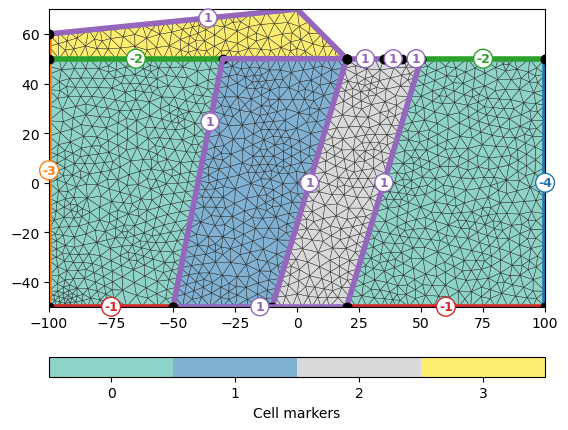

In [58]:
east = -100
west = 100
north = 50
south = -50

world = mt.createWorld(start = [west,north], end = [east, south])

zone_A = mt.createPolygon([[-50,-50], [-10,-50], [20,50], [-30,50]], isClosed=True, marker = 1)
zone_B = mt.createPolygon([[-10,-50], [20,-50], [50,50], [20,50]], isClosed=True, marker = 2)
zone_C = mt.createPolygon([[-100,50], [20,50], [0,70], [-100,60]], isClosed=True, marker = 3)

geometry = world + zone_A + zone_B + zone_C

print(geometry)

mesh = mt.createMesh(geometry, quality = 34, area = 15, smooth = True)
print(mesh)


for bound in mesh.boundaries():
    x = bound.center().x()
    y = bound.center().y()
    if x == mesh.xmin():
        bound.setMarker(-3)
    elif x == mesh.xmax():
        bound.setMarker(-4)

pg.show(mesh, markers = True, showMesh = True);

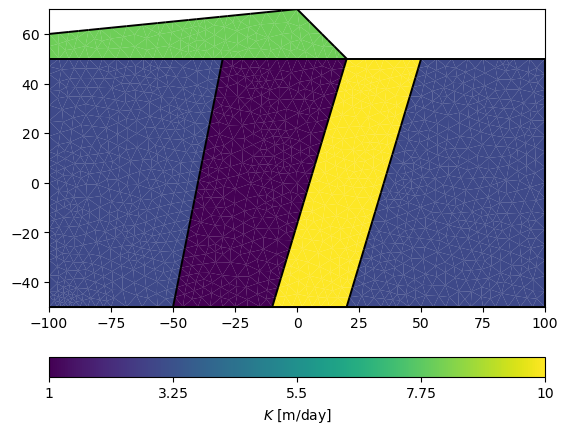

In [60]:
kMap = [[0, 3.0], [1, 1.0], [2, 10.0], [3, 8.0]]
kArray_0 = pg.solver.parseMapToCellArray(list(kMap), mesh) # dict does not work
kArray = np.column_stack([kArray_0] * 3)
showMesh(mesh, kMap, label='$K$ [m/day]');

Mesh:  Mesh: Nodes: 1434 Cells: 2735 Boundaries: 4168
Assembling time:  0.03
Solving time:  0.028


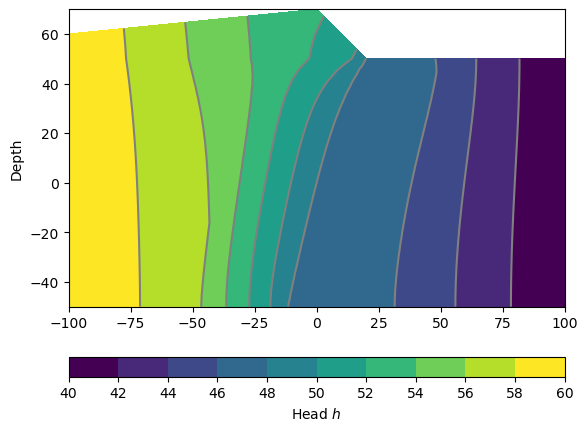

In [61]:
dirichletBC = { -3: 60,
                -4: 40}

h = pg.solve(mesh, a = kMap, bc={'Dirichlet': dirichletBC}, verbose = True)
vel = -pg.solver.grad(mesh, h) * kArray
ax, cbar = showMesh(mesh, data=h, label='Head $h$', nLevs=11)
ax.set_ylabel('Depth');

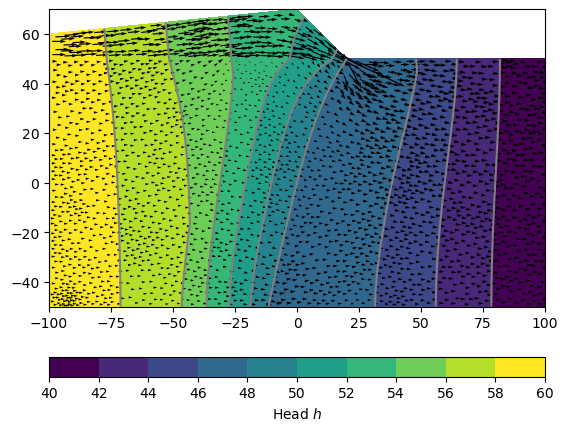

In [62]:
from pygimli.viewer.mpl import drawStreams, drawStreamLines
ax, cb = showMesh(mesh, data=h, label='Head $h$', nLevs=11)
# drawStreamLines(ax, mesh, vel)
drawStreams(ax, mesh, vel, quiver = True)

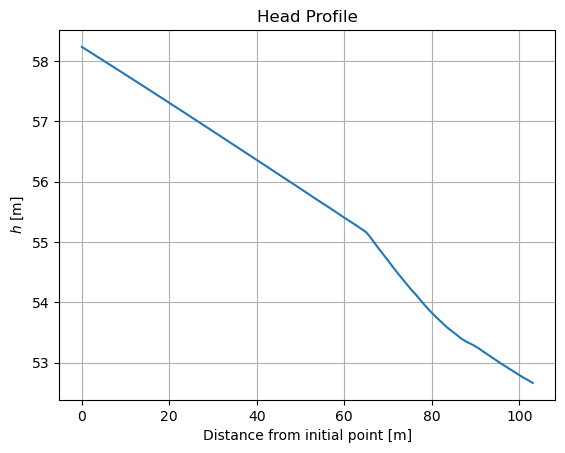

In [69]:
dist = np.arange(east, west, 0.1)

coord_ini = [-75,-20]
coord_end = [-10,60]

steps = 100

dx = abs(coord_ini[0]-coord_end[0])/steps
dy = abs(coord_ini[1]-coord_end[1])/steps

pos = []
dist = []
for i in range(steps+1):
    pos.append([coord_ini[0]+i*dx, coord_ini[1]+i*dy])
    dist.append(((i*dx)**2+(i*dy)**2)**0.5)

hlog = pg.interpolate(mesh, h, pos)
fig, ax = plt.subplots()
ax.plot(dist, hlog)
ax.set_title('Head Profile')
ax.set_xlabel('Distance from initial point [m]')
ax.set_ylabel('$h$ [m]')
ax.grid(True)